In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## TRAIN MODEL ON AMAZON DATASET
Features selection is not scientific or random. I read the data to select words that seem to indicate bad reviews and positive reviews. I am interested in finding bad reviews. Just testing to see if this is feasible with the selected  features. Thank you.

In [2]:
# Grab and process the raw data.
data_path = (r"https://raw.githubusercontent.com/frendy1/Data-Science/master/amazon_cells_labelled.csv")
sms_raw = pd.read_csv(data_path, header=None)
sms_raw.columns = ['sentence', 'score']
print(sms_raw['score'].value_counts())
sms_raw.head()


1    500
0    500
Name: score, dtype: int64


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
keywords_list = [
                 'awesome','fantastic','will get it again','quickly','less expensive','not distracting',
                 'everything','100','very helpful','prevents','outperform','seriously',r"can't beat",
                 'smoothly','less','easy to set up','easy to use','sturdy','wind-resistant','fabulous',
                 'any problem','very well','holding up','without effort','no trouble','fixes all',
                 'rocks','would buy','would definitely','glad','sleek','impressive','without a hitch',
                 'good work','thanks','must have','adorable','eye catching','amazing','really liked',
                 r"won't",'excels','clarity','right away','prompt','no problem','wise decision',    
    
                 'better','fine','sweetest','best','better','excellent','beautiful','easier','great','pleased',
                 'love','impressed','pretty easy','happy','clearer','clear','wow','like','secure','charm',
                 'satisfied','joy','works','very good','10','right','quality','happier','feels good',
                 'would really recommend', 'would recommend','cool','better','flawless','no static'
                 'wonderfully','cheaper','saved','exceptional','perfectly','quite comfortable','fits',
                 'comfortable','any problems','quick','plan on ordering','gets a signal','as described',
                 'quite long','thumbs up','great price','great deal','bargain','five stars','well',
                 'simple','worthwile','highly recommend','what I wanted','surprised','it works',
                  
                 'fails','not enough','lousy','breaks','return','refund','cannot','complain',
                 'returning','weak','useless','worst','break','broke','fail','failed','terible','lose',
                 'crap','sucks','bad','low quality','warning','discomfort',r"dont' trust",'not good',
                 'dont buy it','did not work','Not as good','awkward','unreliable','disappointing',
                 'wont work','would not work','Would not reccommend','Would not',r"wouldn't",'smoke'
                 ]

log_file = open("err_sentiment.log", "a")
try:
    for key in keywords_list:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        sms_raw[str(key)] = sms_raw.sentence.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
    data = sms_raw[keywords_list]
    target = sms_raw['score']

except Exception as e:
    log_file.write("Failed to finish processing: {0}\n".format(str(str(key))))
    print("\nFinished Processing with errors\n")

finally:
    if not log_file.closed:
        log_file.close()
        

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Test your model with different holdout groups.
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("Holdouts")
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross validation
print("Crossvalidation")
print(cross_val_score(bnb, data, target, cv=10))

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
#Confusion matrix
confusion_matrix(target, y_pred)

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))
#F-beta score calculation
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}".format(f2))
print("F0.5 {:0.2f}".format(f0_5))


Holdouts
With 20% Holdout: 0.67
Testing on Sample: 0.717
Crossvalidation
[0.7  0.61 0.6  0.67 0.77 0.66 0.72 0.67 0.68 0.64]
Number of mislabeled points out of a total 1000 points : 283
True Negatives:  471
False Positives:  29
False Negatives:  254
True Positives:  246
Accuracy 71.70%:
Precision 0.89
Recall 0.49
Specificity 0.94
F1 Score 0.63
F2 0.54
F0.5 0.77


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


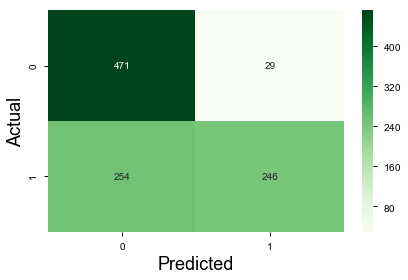

In [4]:
y_actu = pd.Series(target, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sns.heatmap(df_confusion,annot=True,cmap="Greens",fmt='g')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


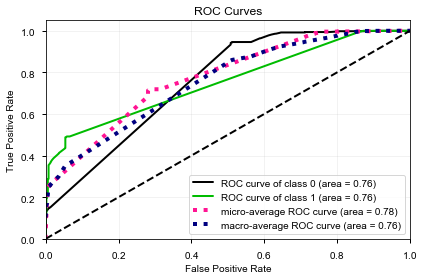

In [5]:
#ROC
import scikitplot as skplt #to make things easy
LR = LogisticRegression()
LR.fit(data,target)
y_pred_proba = LR.predict_proba(data)
skplt.metrics.plot_roc_curve(target, y_pred_proba)
plt.show()

## TEST ON YELP DATASET

In [6]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/frendy1/Data-Science/master/yelp_labelled.csv")
sms_raw2 = pd.read_csv(data_path, header=None)
sms_raw2.columns = ['sentence', 'score']
print(sms_raw2['score'].value_counts())
sms_raw2.head()


1    500
0    500
Name: score, dtype: int64


,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
keywords_list2 = [
                 'awesome','fantastic','will get it again','quickly','less expensive','not distracting',
                 'everything','100','very helpful','prevents','outperform','seriously',r"can't beat",
                 'smoothly','less','easy to set up','easy to use','sturdy','wind-resistant','fabulous',
                 'any problem','very well','holding up','without effort','no trouble','fixes all',
                 'rocks','would buy','would definitely','glad','sleek','impressive','without a hitch',
                 'good work','thanks','must have','adorable','eye catching','amazing','really liked',
                 r"won't",'excels','clarity','right away','prompt','no problem','wise decision',    
    
                 'better','fine','sweetest','best','better','excellent','beautiful','easier','great','pleased',
                 'love','impressed','pretty easy','happy','clearer','clear','wow','like','secure','charm',
                 'satisfied','joy','works','very good','10','right','quality','happier','feels good',
                 'would really recommend', 'would recommend','cool','better','flawless','no static'
                 'wonderfully','cheaper','saved','exceptional','perfectly','quite comfortable','fits',
                 'comfortable','any problems','quick','plan on ordering','gets a signal','as described',
                 'quite long','thumbs up','great price','great deal','bargain','five stars','well',
                 'simple','worthwile','highly recommend','what I wanted','surprised','it works',
                  
                 'fails','not enough','lousy','breaks','return','refund','cannot','complain',
                 'returning','weak','useless','worst','break','broke','fail','failed','terible','lose',
                 'crap','sucks','bad','low quality','warning','discomfort',r"dont' trust",'not good',
                 'dont buy it','did not work','Not as good','awkward','unreliable','disappointing',
                 'wont work','would not work','Would not reccommend','Would not',r"wouldn't",'smoke'
                ]

log_file = open("err_sentiment.log", "a")
try:
    for key in keywords_list2:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        sms_raw2[str(key)] = sms_raw2.sentence.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
    data2 = sms_raw2[keywords_list2]
    target2 = sms_raw2['score']

except Exception as e:
    log_file.write("Failed to finish processing: {0}\n".format(str(str(key))))
    print("\nFinished Processing with errors\n")

finally:
    if not log_file.closed:
        log_file.close()
        
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Test your model with different holdout groups.
# Use train_test_split to create the necessary training and test groups
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=20)
print("Holdouts")
print('With 20% Holdout: ' + str(bnb.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

#Cross validation
print("Crossvalidation")
print(cross_val_score(bnb, data2, target2, cv=10))

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))
#Confusion matrix
confusion_matrix(target2, y_pred2)

#extracting true_positives, false_positives, true_negatives, false_negatives
tn2, fp2, fn2, tp2 = confusion_matrix(target2, y_pred2).ravel()
print("True Negatives: ",tn2)
print("False Positives: ",fp2)
print("False Negatives: ",fn2)
print("True Positives: ",tp2)
#Accuracy
Accuracy2 = (tn2+tp2)*100/(tp2+tn2+fp2+fn2) 
print("Accuracy {:0.2f}%:".format(Accuracy2))
#Precision 
Precision2 = tp2/(tp2+fp2) 
print("Precision {:0.2f}".format(Precision2))
#Recall 
Recall2 = tp2/(tp2+fn2) 
print("Recall {:0.2f}".format(Recall2))
#Specificity 
Specificity2 = tn2/(tn2+fp2)
print("Specificity {:0.2f}".format(Specificity2))
#F1 Score
f12 = (2*Precision2*Recall2)/(Precision2 + Recall2)
print("F1 Score {:0.2f}".format(f12))
#F-beta score calculation
def fbeta2(precision2, recall2, beta2):
    return ((1+pow(beta2,2))*precision2*recall2)/(pow(beta2,2)*precision2 + recall2)
            
f22 = fbeta2(Precision2, Recall2, 2)
f0_52 = fbeta2(Precision2, Recall2, 0.5)

print("F2 {:0.2f}".format(f22))
print("F0.5 {:0.2f}".format(f0_52))


Holdouts
With 20% Holdout: 0.62
Testing on Sample: 0.618
Crossvalidation
[0.61 0.61 0.53 0.57 0.61 0.59 0.7  0.56 0.57 0.64]
Number of mislabeled points out of a total 1000 points : 382
True Negatives:  489
False Positives:  11
False Negatives:  371
True Positives:  129
Accuracy 61.80%:
Precision 0.92
Recall 0.26
Specificity 0.98
F1 Score 0.40
F2 0.30
F0.5 0.61


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


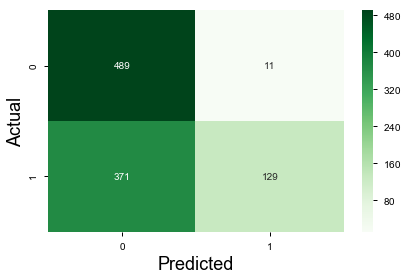

In [8]:
y_actu2 = pd.Series(target2, name='Actual')
y_pred2 = pd.Series(y_pred2, name='Predicted')
df_confusion2 = pd.crosstab(y_actu2, y_pred2)
sns.heatmap(df_confusion2,annot=True,cmap="Greens",fmt='g')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


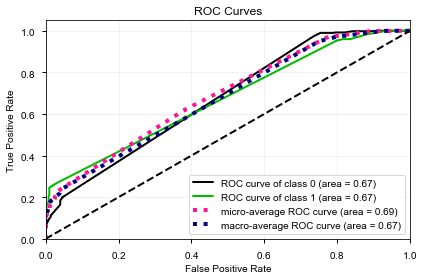

In [9]:
#ROC
import scikitplot as skplt #to make things easy
LR = LogisticRegression()
LR.fit(data2,target2)
y_pred_proba2 = LR.predict_proba(data2)
skplt.metrics.plot_roc_curve(target2, y_pred_proba2)
plt.show()

## TEST AGAIN ON IMDB DATASET

In [10]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/frendy1/Data-Science/master/imdb_labelled.csv")
sms_raw3 = pd.read_csv(data_path, header=None)
sms_raw3.columns = ['sentence', 'score']
print(sms_raw3['score'].value_counts())
sms_raw3.head()


1    386
0    362
Name: score, dtype: int64


,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
keywords_list3 = [
                 'awesome','fantastic','will get it again','quickly','less expensive','not distracting',
                 'everything','100','very helpful','prevents','outperform','seriously',r"can't beat",
                 'smoothly','less','easy to set up','easy to use','sturdy','wind-resistant','fabulous',
                 'any problem','very well','holding up','without effort','no trouble','fixes all',
                 'rocks','would buy','would definitely','glad','sleek','impressive','without a hitch',
                 'good work','thanks','must have','adorable','eye catching','amazing','really liked',
                 r"won't",'excels','clarity','right away','prompt','no problem','wise decision',    
    
                 'better','fine','sweetest','best','better','excellent','beautiful','easier','great','pleased',
                 'love','impressed','pretty easy','happy','clearer','clear','wow','like','secure','charm',
                 'satisfied','joy','works','very good','10','right','quality','happier','feels good',
                 'would really recommend', 'would recommend','cool','better','flawless','no static'
                 'wonderfully','cheaper','saved','exceptional','perfectly','quite comfortable','fits',
                 'comfortable','any problems','quick','plan on ordering','gets a signal','as described',
                 'quite long','thumbs up','great price','great deal','bargain','five stars','well',
                 'simple','worthwile','highly recommend','what I wanted','surprised','it works',
                  
                 'fails','not enough','lousy','breaks','return','refund','cannot','complain',
                 'returning','weak','useless','worst','break','broke','fail','failed','terible','lose',
                 'crap','sucks','bad','low quality','warning','discomfort',r"dont' trust",'not good',
                 'dont buy it','did not work','Not as good','awkward','unreliable','disappointing',
                 'wont work','would not work','Would not reccommend','Would not',r"wouldn't",'smoke'
                ]

log_file = open("err_sentiment.log", "a")
try:
    for key in keywords_list3:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        sms_raw3[str(key)] = sms_raw3.sentence.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
    data3 = sms_raw3[keywords_list3]
    target3 = sms_raw3['score']

except Exception as e:
    log_file.write("Failed to finish processing: {0}\n".format(str(str(key))))
    print("\nFinished Processing with errors\n")

finally:
    if not log_file.closed:
        log_file.close()
        
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Test your model with different holdout groups.
# Use train_test_split to create the necessary training and test groups
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size=0.2, random_state=20)
print("Holdouts")
print('With 20% Holdout: ' + str(bnb.fit(X_train3, y_train3).score(X_test3, y_test3)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

#Cross validation
print("Crossvalidation")
print(cross_val_score(bnb, data3, target3, cv=10))

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
#Confusion matrix
confusion_matrix(target3, y_pred3)

#extracting true_positives, false_positives, true_negatives, false_negatives
tn3, fp3, fn3, tp3 = confusion_matrix(target3, y_pred3).ravel()
print("True Negatives: ",tn3)
print("False Positives: ",fp3)
print("False Negatives: ",fn3)
print("True Positives: ",tp3)
#Accuracy
Accuracy3 = (tn3+tp3)*100/(tp3+tn3+fp3+fn3) 
print("Accuracy {:0.2f}%:".format(Accuracy3))
#Precision 
Precision3 = tp3/(tp3+fp3) 
print("Precision {:0.2f}".format(Precision3))
#Recall 
Recall3 = tp3/(tp3+fn3) 
print("Recall {:0.2f}".format(Recall3))
#Specificity 
Specificity3 = tn3/(tn3+fp3)
print("Specificity {:0.2f}".format(Specificity3))
#F1 Score
f13 = (2*Precision3*Recall3)/(Precision3 + Recall3)
print("F1 Score {:0.2f}".format(f13))
#F-beta score calculation
def fbeta3(precision3, recall3, beta3):
    return ((1+pow(beta3,2))*precision3*recall3)/(pow(beta3,2)*precision3 + recall3)
            
f23 = fbeta3(Precision3, Recall3, 2)
f0_53 = fbeta3(Precision3, Recall3, 0.5)

print("F2 {:0.2f}".format(f23))
print("F0.5 {:0.2f}".format(f0_53))


Holdouts
With 20% Holdout: 0.54
Testing on Sample: 0.6176470588235294
Crossvalidation
[0.52631579 0.52631579 0.58666667 0.58666667 0.56       0.52
 0.5        0.54054054 0.45945946 0.56756757]
Number of mislabeled points out of a total 748 points : 286
True Negatives:  345
False Positives:  17
False Negatives:  269
True Positives:  117
Accuracy 61.76%:
Precision 0.87
Recall 0.30
Specificity 0.95
F1 Score 0.45
F2 0.35
F0.5 0.63


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


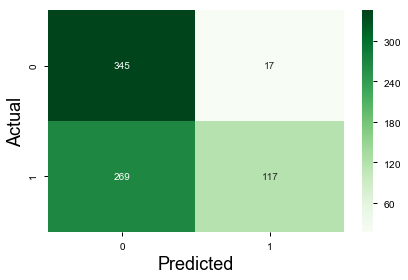

In [12]:
y_actu3 = pd.Series(target3, name='Actual')
y_pred3 = pd.Series(y_pred3, name='Predicted')
df_confusion3 = pd.crosstab(y_actu3, y_pred3)
sns.heatmap(df_confusion3,annot=True,cmap="Greens",fmt='g')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


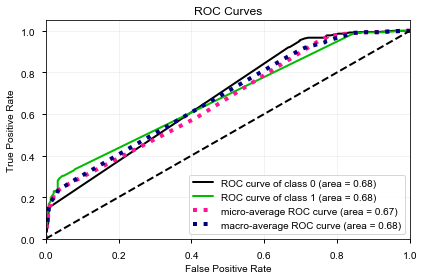

In [13]:
#ROC
import scikitplot as skplt #to make things easy
LR = LogisticRegression()
LR.fit(data3,target3)
y_pred_proba3 = LR.predict_proba(data3)
skplt.metrics.plot_roc_curve(target3, y_pred_proba3)
plt.show()